<a href="https://colab.research.google.com/github/yashyaks/compute_tasks/blob/main/Lab_2/Lab2.2_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Loading the Dataset

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/yashyaks/compute_tasks/main/Lab_2/Iris.csv")

# Basic EDA

In [25]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [27]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<AxesSubplot:xlabel='Species', ylabel='count'>

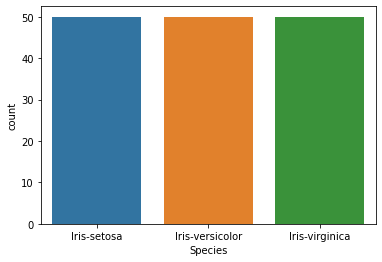

In [28]:
x = df.value_counts("Species")
print(x)
sns.countplot(x=df["Species"])

In [29]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Species_num'] = label_encoder.fit_transform(df['Species'])

<AxesSubplot:>

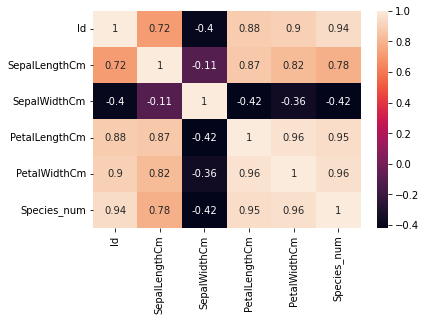

In [8]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [50]:
df_features = df.iloc[:,-6:-2]
df_target = df.iloc[:,-2]
print("feature_columns")
print(df_features.head())
print("target_column")
print(df_target.head())

feature_columns
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
target_column
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2,random_state = 101)

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [36]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

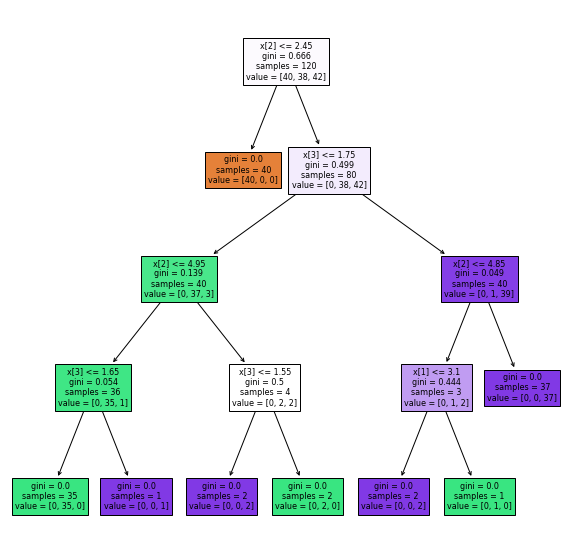

In [47]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
tree.plot_tree(classifier,filled = True)
plt.show()

In [44]:
#Predict the response for test dataset
y_pred_test = classifier.predict(x_test)

In [39]:
from sklearn import metrics

score = metrics.accuracy_score(y_pred_test,y_test)
print(score)

0.9666666666666667


In [51]:
from sklearn import metrics

c_matrix_test = metrics.confusion_matrix(y_test, y_pred_test)

print(c_matrix_test)

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]


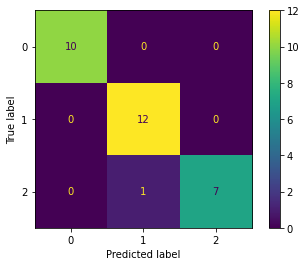

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_test)
disp.plot()

In [41]:
#Predict the response for train dataset
y_pred_train = classifier.predict(x_train)

In [42]:
from sklearn import metrics

score = metrics.accuracy_score(y_pred_train,y_train)
print(score)

1.0


In [57]:
from sklearn import metrics

c_matrix_train = metrics.confusion_matrix(y_train, y_pred_train)

print(c_matrix_train)

[[40  0  0]
 [ 0 38  0]
 [ 0  0 42]]


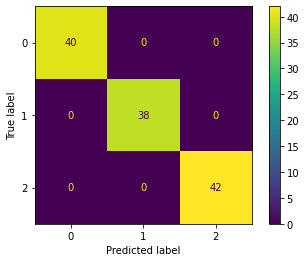

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_train)
disp.plot()